In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import os
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
conf = OmegaConf.load('../config.yaml')
dataframes = os.listdir(conf.models.train.dataframes_folder)

In [16]:

sns.set_theme(style="dark")
df = pd.read_csv(conf.models.train.dataframes_folder + dataframes[89])

In [17]:
print(conf.models.train.dataframes_folder + dataframes[89])

../EDA/dataframe_model/stretchedSociety_block_96_MAC001243.csv


In [18]:
def cleaning(df):
    df_copy = df[['time','Energy_kwh']]
    df_copy.time = pd.to_datetime(df_copy.time)
    #df_copy['month'] = df_copy.time.dt.month
    #df_copy['year'] = df_copy.time.dt.year
    #df_copy['hour'] = df_copy.time.dt.hour
    #df_copy['hour'] = df_copy['hour'].astype('str')
    return df_copy

In [19]:
teste = cleaning(df)

/tmp/ipykernel_6911/2957933644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.time = pd.to_datetime(df_copy.time)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def plot_monthly_energy(df):
    # Certifique-se que a coluna time está no formato datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Criar colunas auxiliares para melhor visualização
    df['month_year'] = df['time'].dt.strftime('%Y-%m')
    df['hour'] = df['time'].dt.hour
    
    # Configurar o estilo do seaborn
    sns.set_theme(style="darkgrid")  # Usando set_theme em vez de set_style
    
    # Obter lista única de meses
    months = sorted(df['month_year'].unique())
    
    # Calcular número de linhas e colunas para subplots
    n_months = len(months)
    n_cols = 3
    n_rows = (n_months + n_cols - 1) // n_cols
    
    # Criar figura
    fig = plt.figure(figsize=(16, 4.5*n_rows))
    
    # Plotar dados para cada mês
    for idx, month in enumerate(months):
        # Filtrar dados do mês
        month_data = df[df['month_year'] == month]
        
        # Criar subplot
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        
        # Plotar linha média
        sns.lineplot(data=month_data, x='hour', y='Energy_kwh', 
                    ci='sd',  # Mostra desvio padrão
                    linewidth=2)
        
        # Adicionar pontos de dispersão com transparência
        sns.scatterplot(data=month_data, x='hour', y='Energy_kwh', 
                       alpha=0.1, color='blue', size=1)
        
        # Calcular estatísticas mensais
        mean_energy = month_data['Energy_kwh'].mean()
        max_energy = month_data['Energy_kwh'].max()
        min_energy = month_data['Energy_kwh'].min()
        std_energy = month_data['Energy_kwh'].std()
        
        # Adicionar texto com estatísticas
        stats_text = (f'Mean: {mean_energy:.2f} kWh\n'
                     f'Max: {max_energy:.2f} kWh\n'
                     f'Mín: {min_energy:.2f} kWh\n'
                     f'Deviation: {std_energy:.2f} kWh')
        
        plt.text(0.95, 0.95, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Configurar eixos e título
        plt.title(f'Energy Consumption - {month}', pad=15)
        plt.xlabel('Time of Day')
        plt.ylabel('Energy (kWh)')
        
        # Ajustar limites e ticks do eixo x
        plt.xlim(-0.5, 23.5)
        plt.xticks(range(0, 24, 3))
    
    # Ajustar layout
    plt.tight_layout()
    return fig

def plot_daily_pattern(df):
    """Função adicional para mostrar o padrão diário médio"""
    # Preparar dados
    df['hour'] = df['time'].dt.hour
    df['month'] = df['time'].dt.strftime('%Y-%m')
    
    # Configurar o tema do seaborn
    sns.set_theme(style="darkgrid")
    
    # Criar figura
    plt.figure(figsize=(12, 6))
    
    # Plotar padrão diário médio com intervalo de confiança
    sns.lineplot(data=df, x='hour', y='Energy_kwh', ci=95)
    
    # Adicionar pontos de dispersão com transparência
    sns.scatterplot(data=df, x='hour', y='Energy_kwh', alpha=0.1, color='blue', size=1,legend=False)
    
    #plt.title('Average Daily Energy Consumption Pattern in household with id 1243', fontsize=16)
    plt.xlabel('Time of Day')
    plt.ylabel('Energy (kWh)')
    plt.xticks(range(0, 24, 1))

    return plt.gcf()

# Exemplo de uso:
"""
# Carregar seus dados
df = pd.read_csv('seu_arquivo.csv')  # ou sua fonte de dados
df['time'] = pd.to_datetime(df['time'])

# Criar os gráficos
fig1 = plot_monthly_energy(df)
fig2 = plot_daily_pattern(df)
plt.show()
"""

"\n# Carregar seus dados\ndf = pd.read_csv('seu_arquivo.csv')  # ou sua fonte de dados\ndf['time'] = pd.to_datetime(df['time'])\n\n# Criar os gráficos\nfig1 = plot_monthly_energy(df)\nfig2 = plot_daily_pattern(df)\nplt.show()\n"

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def plot_monthly_energy(df):
    # Certifique-se que a coluna time está no formato datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Criar colunas auxiliares para melhor visualização
    df['month_year'] = df['time'].dt.strftime('%Y-%m')
    df['hour'] = df['time'].dt.hour
    
    # Configurar o estilo do seaborn
    sns.set_theme(style="darkgrid")
    
    # Obter lista única de meses
    months = sorted(df['month_year'].unique())
    
    # Calcular número de linhas e colunas para subplots
    n_months = len(months)
    n_cols = 3
    n_rows = (n_months + n_cols - 1) // n_cols
    
    # Criar figura
    fig = plt.figure(figsize=(16, 4.5*n_rows))
    
    # Calcular os limites globais para o eixo y
    global_min = df['Energy_kwh'].min()
    global_max = df['Energy_kwh'].max()
    
    # Adicionar uma pequena margem aos limites (5% do range)
    y_margin = (global_max - global_min) * 0.05
    y_min = global_min - y_margin
    y_max = global_max + y_margin
    
    # Plotar dados para cada mês
    for idx, month in enumerate(months):
        # Filtrar dados do mês
        month_data = df[df['month_year'] == month]
        
        # Criar subplot
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        
        # Plotar linha média
        sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
                    ci='sd',  # Mostra desvio padrão
                    linewidth=2)
        
        # Adicionar pontos de dispersão com transparência
        sns.scatterplot(data=month_data, x='hour', y='Energy_kwh',
                       alpha=0.1, color='blue', size=1)
        
        # Remover a legenda
        ax.get_legend().remove()
        
        # Calcular estatísticas mensais
        mean_energy = month_data['Energy_kwh'].mean()
        max_energy = month_data['Energy_kwh'].max()
        min_energy = month_data['Energy_kwh'].min()
        std_energy = month_data['Energy_kwh'].std()
        
        # Adicionar texto com estatísticas
        stats_text = (f'Mean: {mean_energy:.2f} kWh\n'
                     f'Max: {max_energy:.2f} kWh\n'
                     f'Min: {min_energy:.2f} kWh\n'
                     f'Deviation: {std_energy:.2f} kWh')
        
        plt.text(0.95, 0.95, stats_text,
                transform=ax.transAxes,
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Configurar eixos e título
        plt.title(f'Energy Consumption - {month}', pad=15)
        plt.xlabel('Hour of Day')
        plt.ylabel('Energy (kWh)')
        
        # Ajustar limites dos eixos
        plt.xlim(-0.5, 23.5)
        plt.ylim(y_min, y_max)
        plt.xticks(range(0, 24, 3))
    
    # Ajustar layout
    plt.tight_layout()
    return fig

def plot_daily_pattern(df):
    """Função adicional para mostrar o padrão diário médio"""
    # Preparar dados
    df['hour'] = df['time'].dt.hour
    df['month'] = df['time'].dt.strftime('%Y-%m')
    
    # Configurar o tema do seaborn
    sns.set_theme(style="darkgrid")
    
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plotar padrão diário médio com intervalo de confiança
    sns.lineplot(data=df, x='hour', y='Energy_kwh', ci=95, ax=ax)
    
    # Adicionar pontos de dispersão com transparência
    sns.scatterplot(data=df, x='hour', y='Energy_kwh', 
                   alpha=0.1, color='blue', size=1, 
                   legend=False, ax=ax)
    
    # Calcular estatísticas
    mean_energy = df['Energy_kwh'].mean()
    max_energy = df['Energy_kwh'].max()
    min_energy = df['Energy_kwh'].min()
    std_energy = df['Energy_kwh'].std()
    
    # Adicionar texto com estatísticas
    stats_text = (f'Mean: {mean_energy:.2f} kWh\n'
                 f'Max: {max_energy:.2f} kWh\n'
                 f'Min: {min_energy:.2f} kWh\n'
                 f'Deviation: {std_energy:.2f} kWh')
    
    plt.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Configurar eixos e rótulos
    plt.xlabel('Hour of Day')
    plt.ylabel('Energy (kWh)')
    plt.xticks(range(0, 24, 1))
    
    # Ajustar layout
    plt.tight_layout()
    
    return fig

# Exemplo de uso:
"""
# Carregar seus dados
df = pd.read_csv('seu_arquivo.csv')  # ou sua fonte de dados
df['time'] = pd.to_datetime(df['time'])

# Criar os gráficos
fig1 = plot_monthly_energy(df)
fig2 = plot_daily_pattern(df)
plt.show()
"""

"\n# Carregar seus dados\ndf = pd.read_csv('seu_arquivo.csv')  # ou sua fonte de dados\ndf['time'] = pd.to_datetime(df['time'])\n\n# Criar os gráficos\nfig1 = plot_monthly_energy(df)\nfig2 = plot_daily_pattern(df)\nplt.show()\n"

/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=month_data, x='hour', y='Energy_kwh',
/tmp/ipykernel_6911/3536163570.py:46: FutureWarning: 



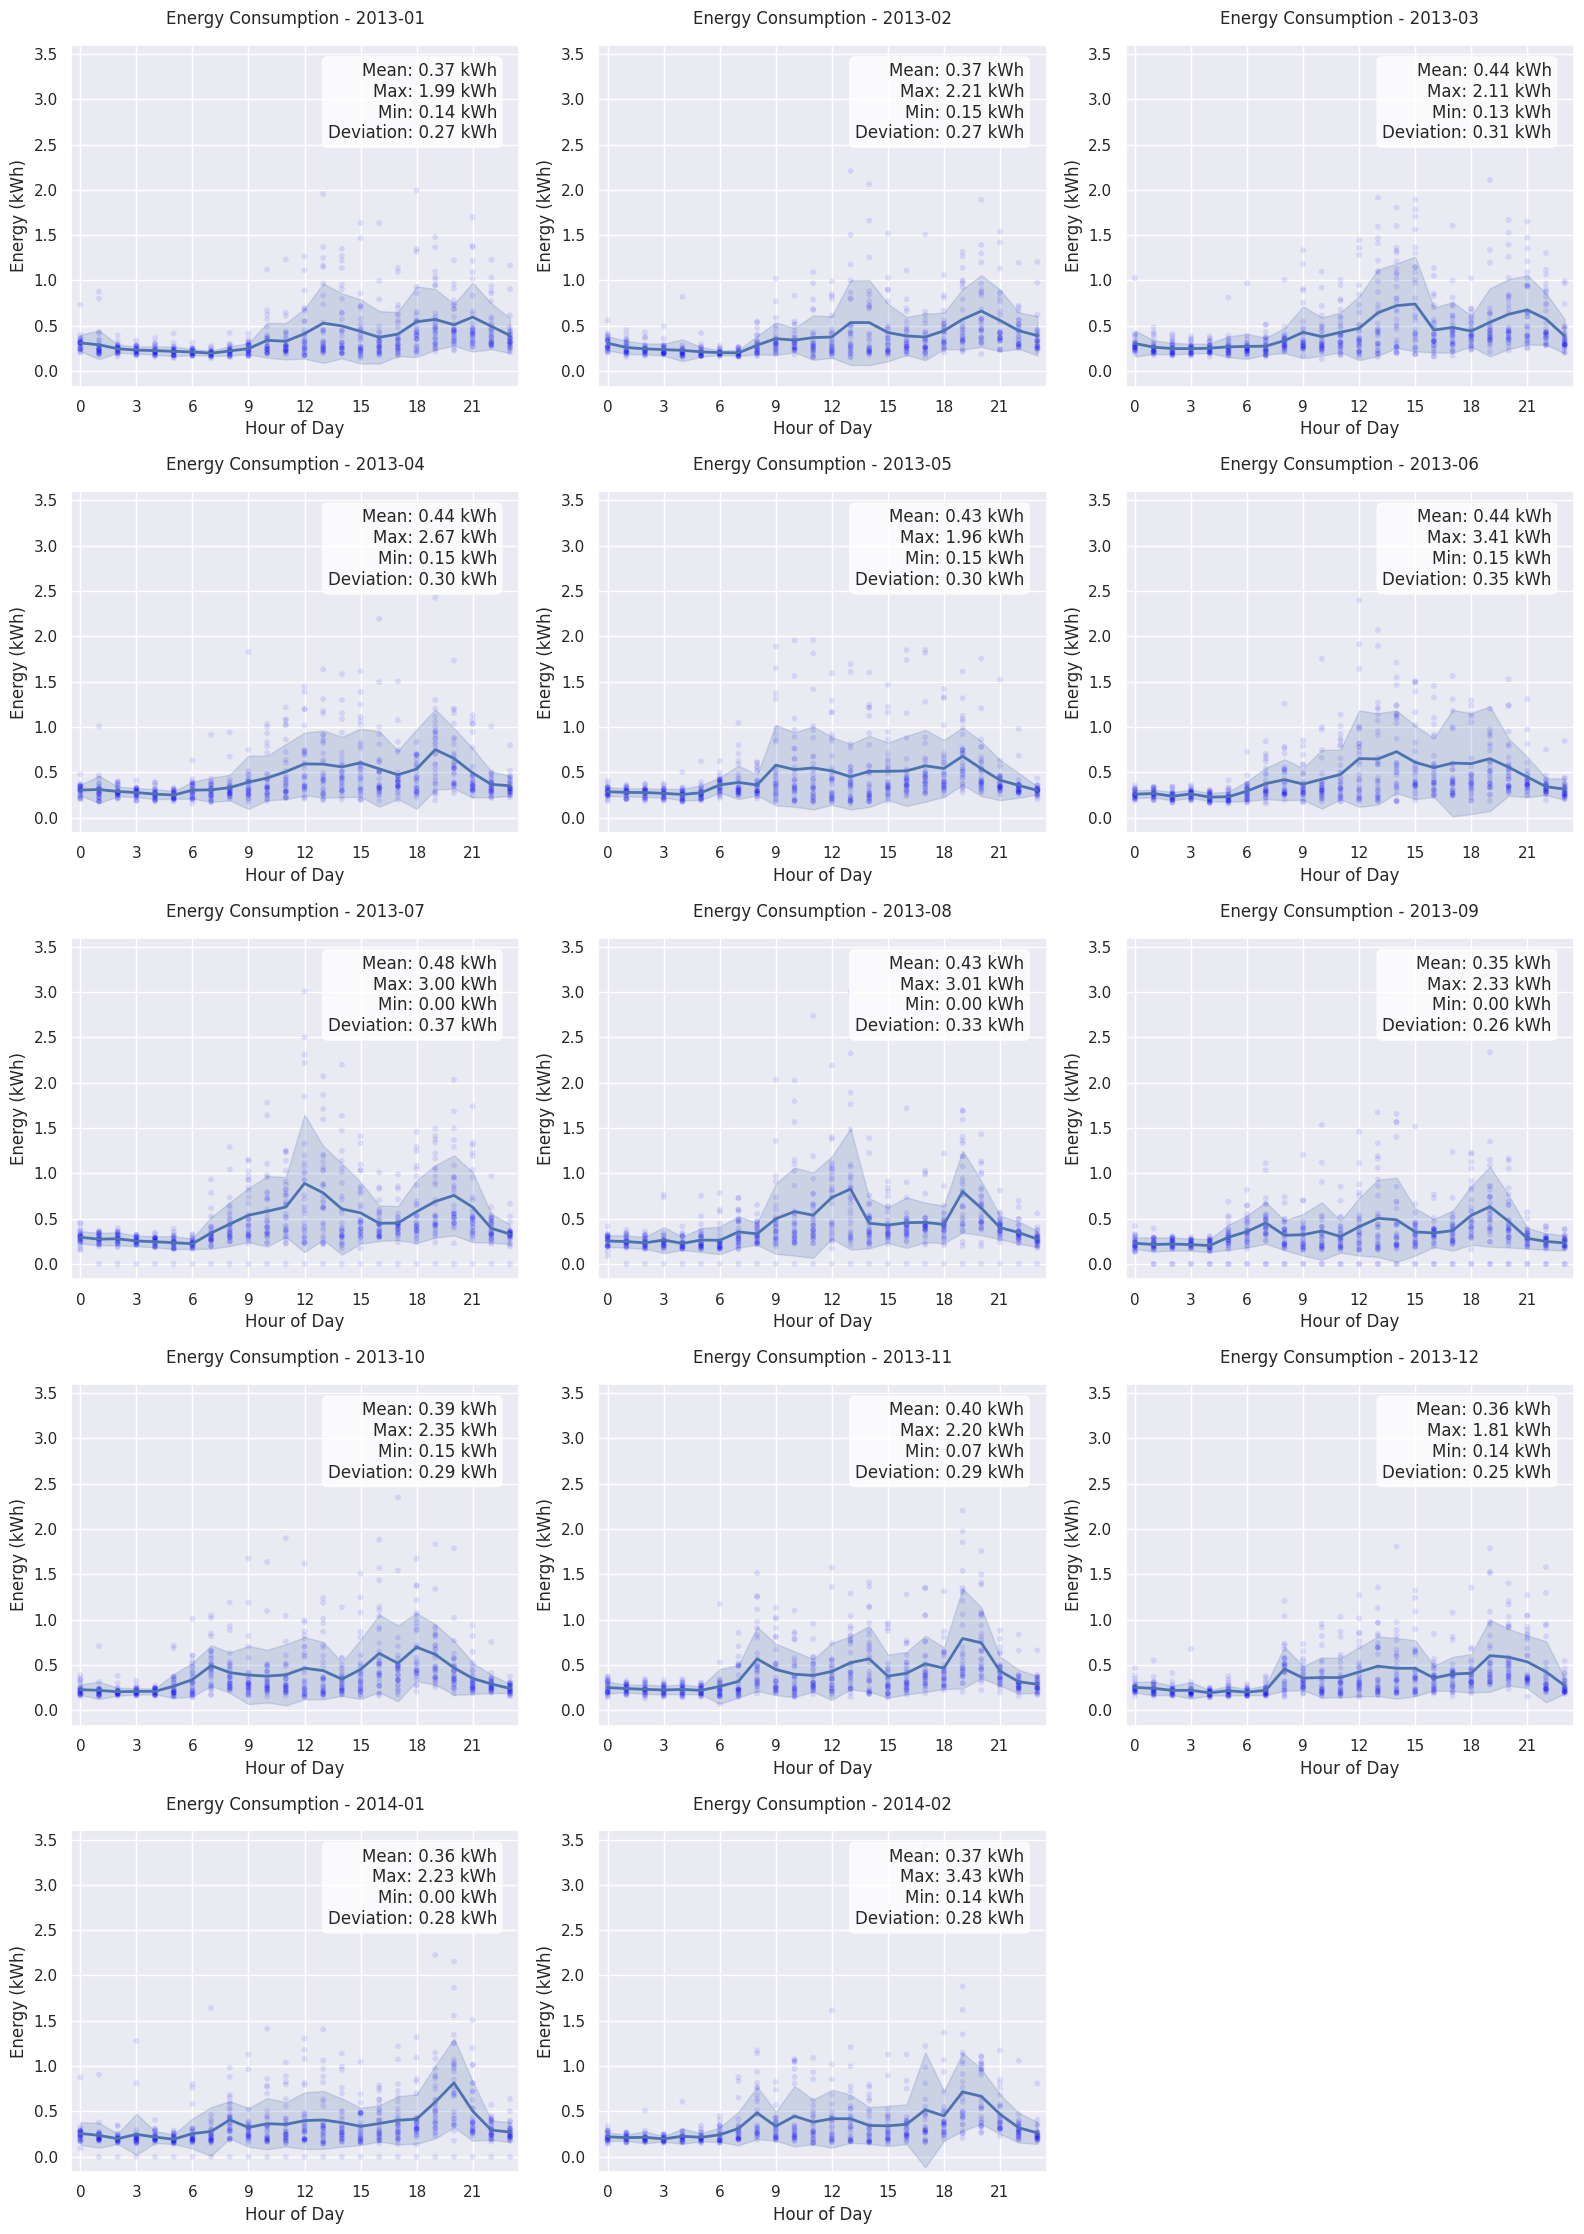

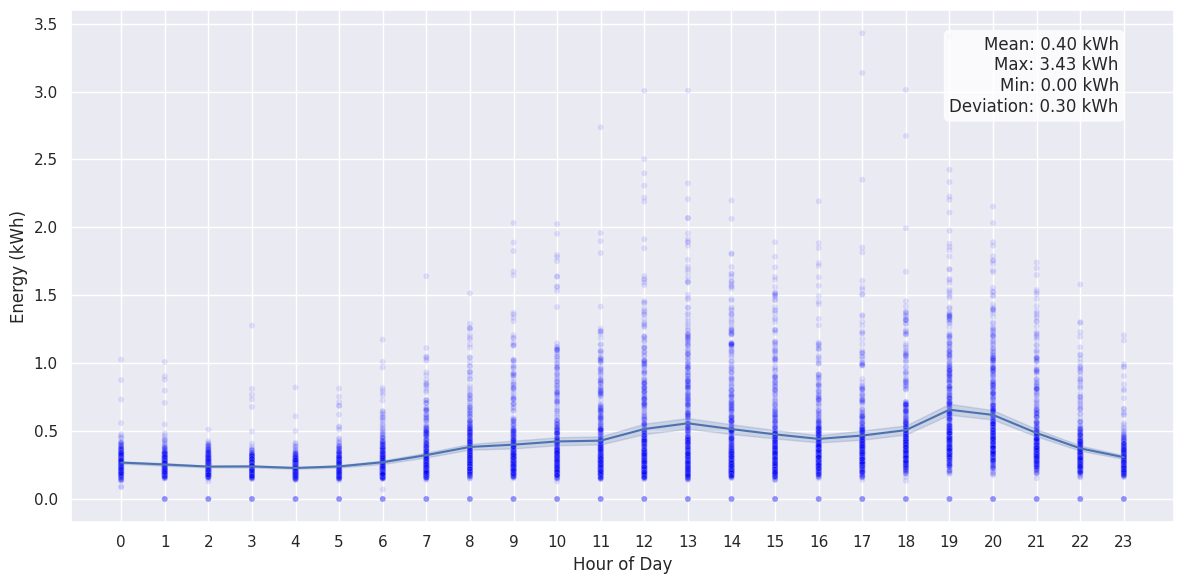

In [67]:
fig1 = plot_monthly_energy(df)
plt.savefig('mes_mes_hour_day.png')
fig2 = plot_daily_pattern(df)
plt.savefig('all_mes_mes_hour_day.png')

plt.show()

In [59]:
def plot_monthly_time_series(df):
    # Certifique-se que a coluna time está no formato datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Criar coluna de mês-ano para agrupar
    df['month_year'] = df['time'].dt.strftime('%Y-%m')
    
    # Configurar o estilo
    sns.set_theme(style="darkgrid")
    
    # Obter lista única de meses
    months = sorted(df['month_year'].unique())
    
    # Calcular número de linhas e colunas para subplots
    n_months = len(months)
    n_cols = 3
    n_rows = (n_months + n_cols - 1) // n_cols
    
    # Criar figura
    fig = plt.figure(figsize=(16, 4.5*n_rows))
    
    # Plotar dados para cada mês
    for idx, month in enumerate(months):
        # Filtrar dados do mês
        month_data = df[df['month_year'] == month].copy()
        
        # Criar subplot
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        
        # Plotar linha do consumo de energia
        sns.lineplot(data=month_data, x='time', y='Energy_kwh', 
                    linewidth=1, alpha=0.8)
        
        # Calcular estatísticas mensais
        mean_energy = month_data['Energy_kwh'].mean()
        max_energy = month_data['Energy_kwh'].max()
        min_energy = month_data['Energy_kwh'].min()
        std_energy = month_data['Energy_kwh'].std()
        
        # Adicionar linha média
        ax.axhline(y=mean_energy, color='r', linestyle='--', alpha=0.5)
        
        # Configurar eixos e título
        plt.title(f'Energy Consumption - {month}', pad=15)
        plt.xlabel('Date/Hour')
        plt.ylabel('Energy (kWh)')
        
        # Rotacionar labels do eixo x
        plt.xticks(rotation=45)
        
        # Ajustar os limites do eixo y para ser consistente entre os gráficos
        if idx == 0:
            # Guardar os limites do primeiro gráfico
            ylim = ax.get_ylim()
        else:
            # Aplicar os mesmos limites aos outros gráficos
            ax.set_ylim(ylim)
        
        # Formatar datas no eixo x
        ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m\n%H:%M'))
        
    # Ajustar layout
    plt.tight_layout()
    return fig

def plot_full_time_series(df):
    """Função adicional para mostrar toda a série temporal em um único gráfico"""
    # Configurar o tema do seaborn
    sns.set_theme(style="darkgrid")
    
    # Criar figura
    plt.figure(figsize=(15, 8))
    
    # Plotar série temporal completa
    sns.lineplot(data=df, x='time', y='Energy_kwh', linewidth=1)
    
    # Adicionar linha de tendência
    z = np.polyfit(range(len(df)), df['Energy_kwh'], 1)
    p = np.poly1d(z)
    plt.plot(df['time'], p(range(len(df))), "r--")
    
    # Configurar o gráfico
    plt.title('Complete Energy Consumption Time Series')
    plt.xlabel('Date/Hour')
    plt.ylabel('Energy (kWh)')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Formatar datas no eixo x
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    
    plt.tight_layout()
    return plt.gcf()

/tmp/ipykernel_6911/1925382516.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


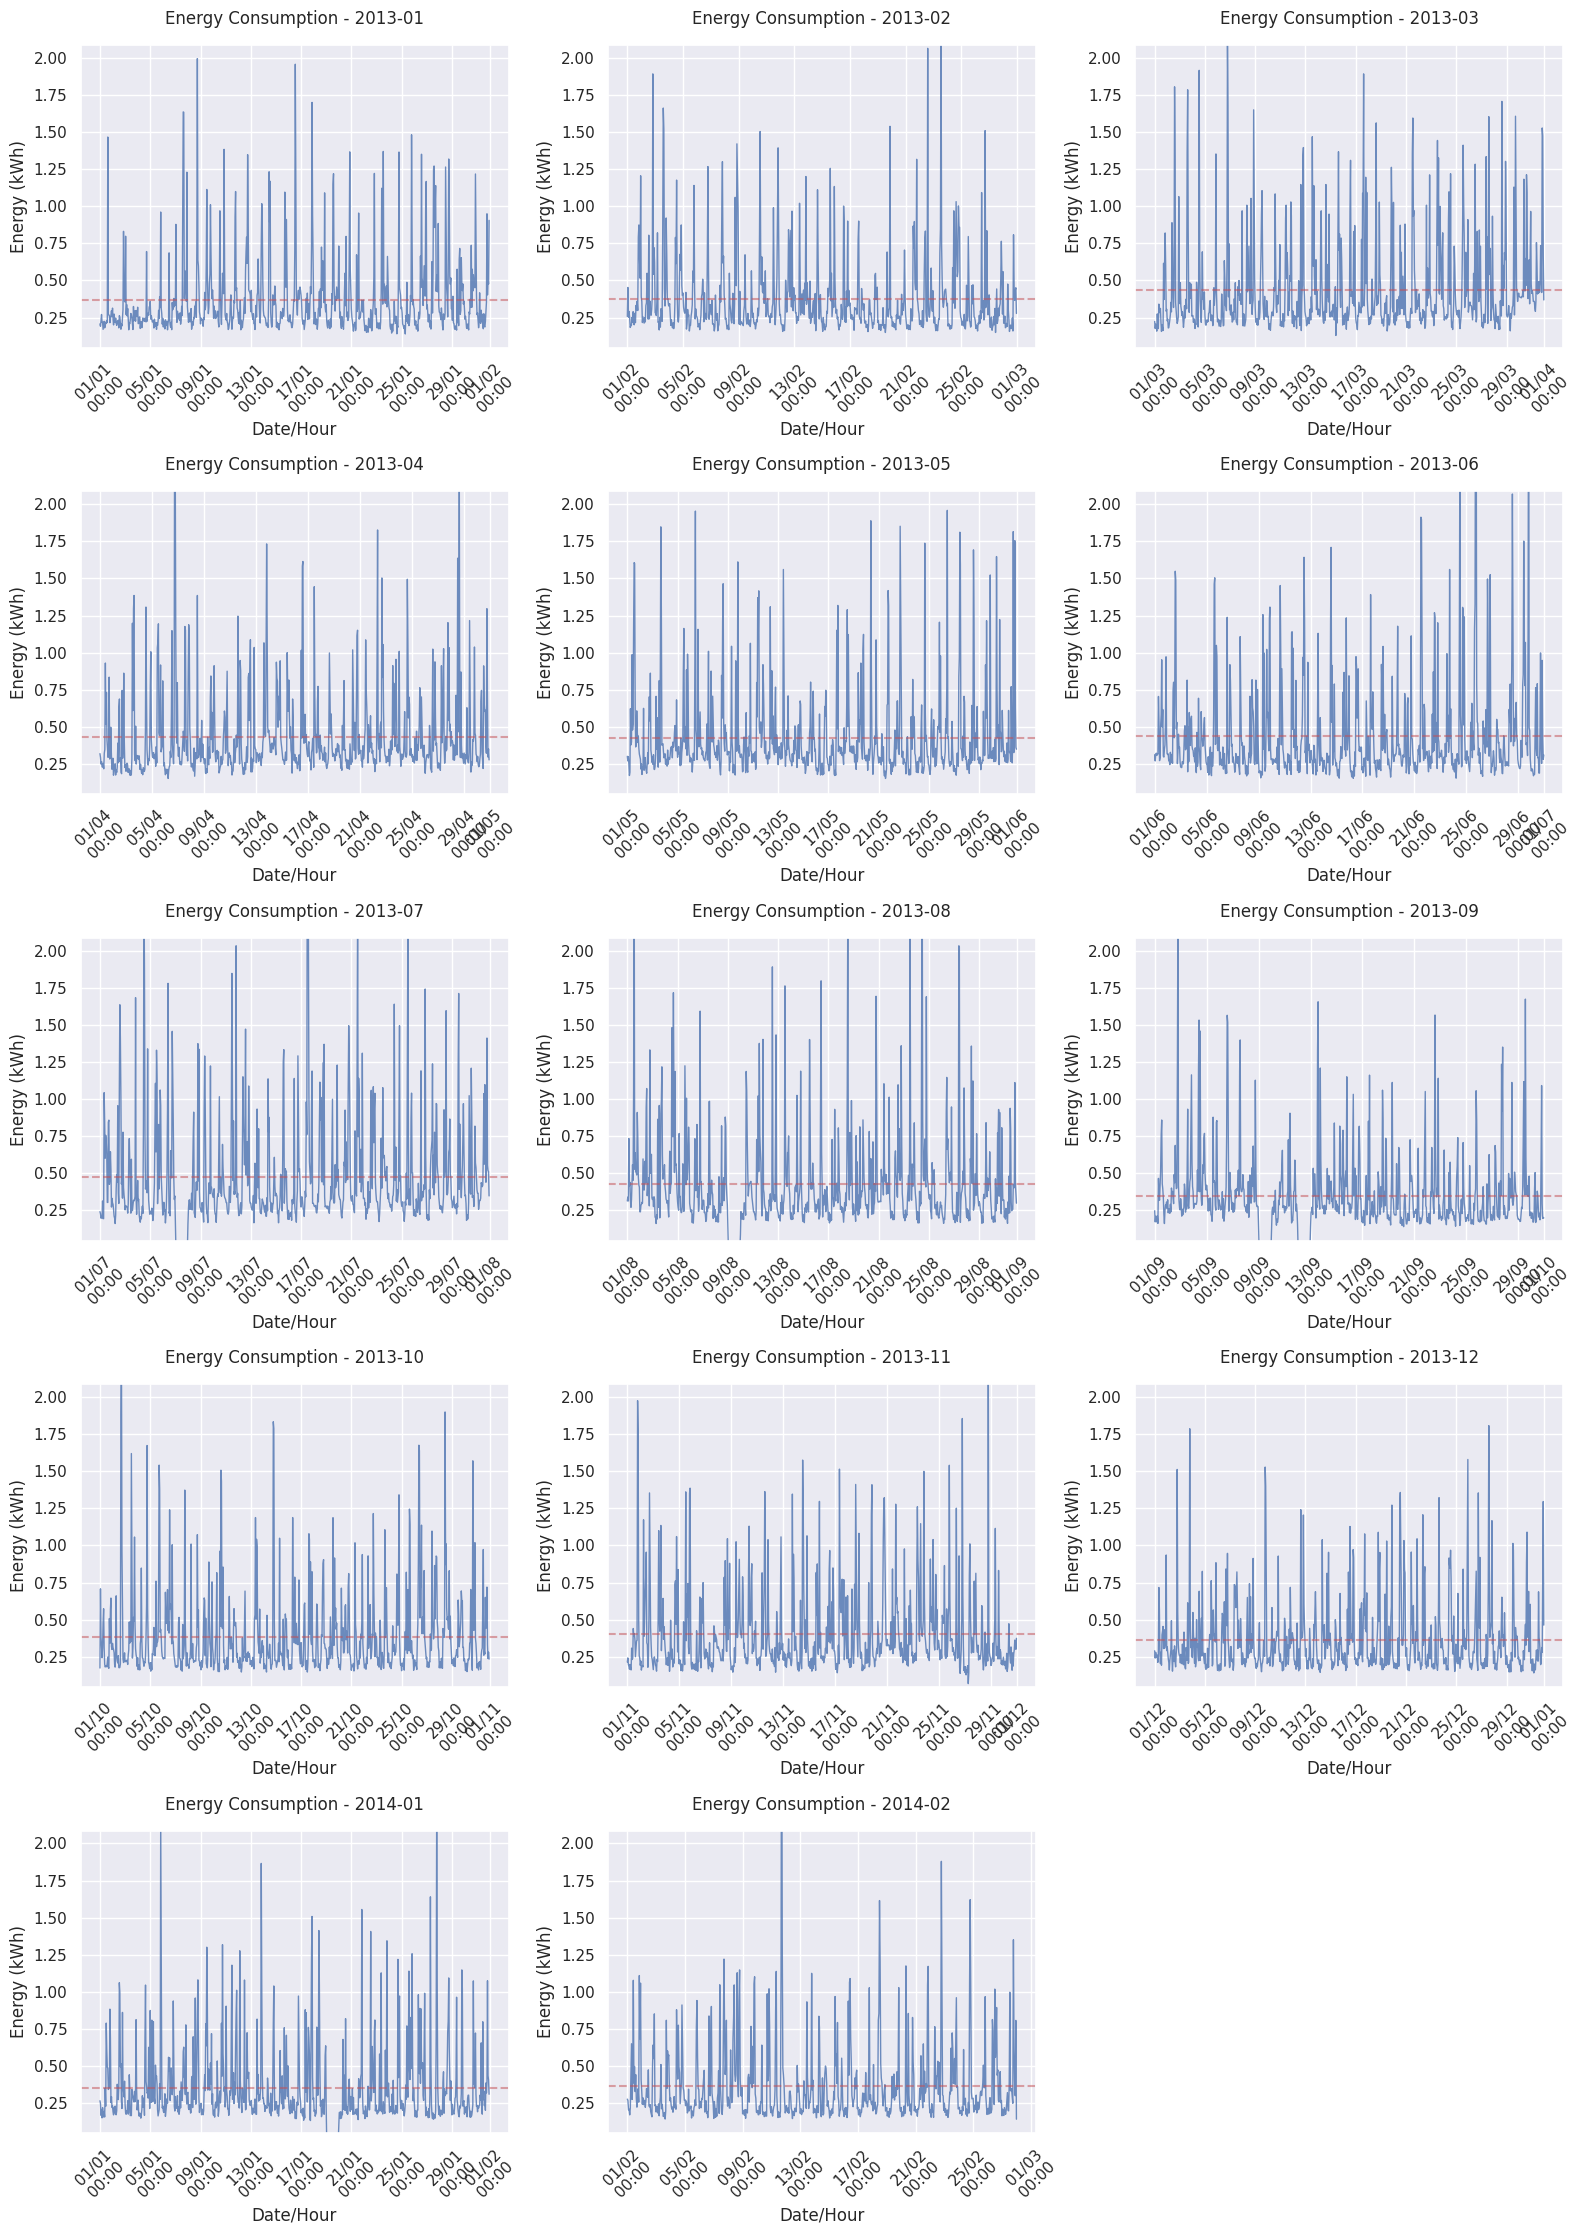

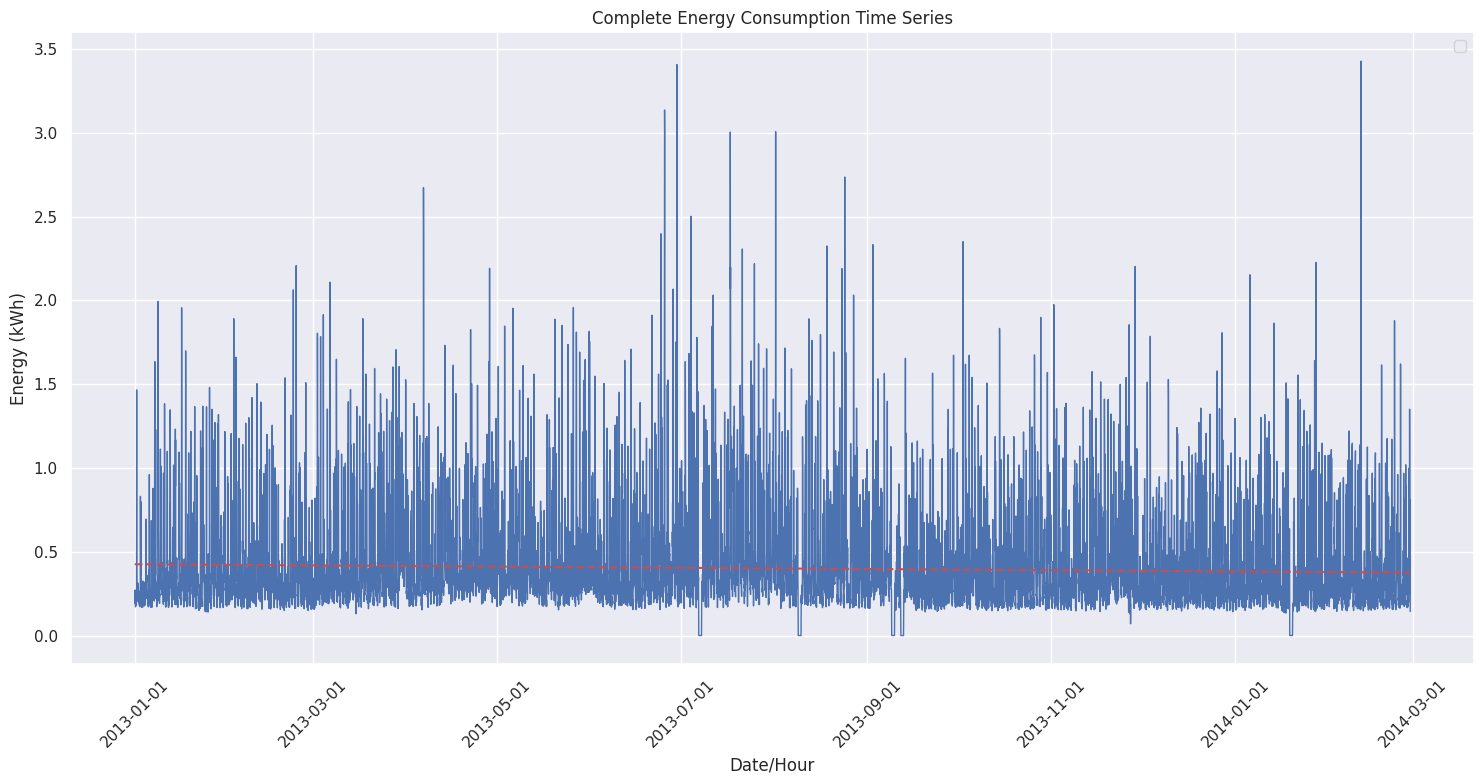

In [60]:
fig1 = plot_monthly_time_series(df)
plt.savefig('serie_mes_mes.png')
fig2 = plot_full_time_series(df)
plt.savefig('serie_geral.png')
plt.show()

In [17]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime

def prepare_data(df):
    """
    Prepara os dados para análise, criando colunas auxiliares necessárias
    """
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    df['month_year'] = df['time'].dt.strftime('%Y-%m')
    df['hour'] = df['time'].dt.hour
    df['date'] = df['time'].dt.date
    return df

def create_full_time_series(df):
    """
    Cria o gráfico da série temporal completa com linha de tendência
    """
    # Criar a linha principal de consumo
    main_line = go.Scatter(
        x=df['time'],
        y=df['Energy_kwh'],
        name='Consumo',
        line=dict(color='blue'),
        hovertemplate='%{x}<br>Consumo: %{y:.2f} kWh<extra></extra>'
    )
    
    # Criar linha de tendência
    z = np.polyfit(range(len(df)), df['Energy_kwh'], 1)
    p = np.poly1d(z)
    trend_line = go.Scatter(
        x=df['time'],
        y=p(range(len(df))),
        name='Tendência',
        line=dict(color='red', dash='dash'),
        hovertemplate='Tendência: %{y:.2f} kWh<extra></extra>'
    )
    
    return [main_line, trend_line]

def create_daily_pattern(df):
    """
    Cria o gráfico do padrão diário médio com área de confiança
    """
    hourly_stats = df.groupby('hour')['Energy_kwh'].agg(['mean', 'std']).reset_index()
    
    mean_line = go.Scatter(
        x=hourly_stats['hour'],
        y=hourly_stats['mean'],
        name='Média Diária',
        line=dict(color='green'),
        hovertemplate='Hora: %{x}<br>Média: %{y:.2f} kWh<extra></extra>'
    )
    
    confidence_area = go.Scatter(
        x=hourly_stats['hour'].tolist() + hourly_stats['hour'].tolist()[::-1],
        y=(hourly_stats['mean'] + hourly_stats['std']).tolist() + 
           (hourly_stats['mean'] - hourly_stats['std']).tolist()[::-1],
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        name='Desvio Padrão',
        showlegend=True,
        hovertemplate='Desvio Padrão<extra></extra>'
    )
    
    return [mean_line, confidence_area]

def create_monthly_plot(month_data, month):
    """
    Cria o gráfico para um mês específico
    """
    # Calcular estatísticas
    stats = {
        'Média': month_data['Energy_kwh'].mean(),
        'Máximo': month_data['Energy_kwh'].max(),
        'Mínimo': month_data['Energy_kwh'].min(),
        'Desvio': month_data['Energy_kwh'].std()
    }
    
    consumption_line = go.Scatter(
        x=month_data['time'],
        y=month_data['Energy_kwh'],
        name=f'Consumo - {month}',
        line=dict(color='blue'),
        hovertemplate=(
            '%{x}<br>' +
            'Consumo: %{y:.2f} kWh<br>' +
            f'Média: {stats["Média"]:.2f} kWh<br>' +
            f'Máx: {stats["Máximo"]:.2f} kWh<br>' +
            f'Mín: {stats["Mínimo"]:.2f} kWh<br>' +
            f'Desvio: {stats["Desvio"]:.2f} kWh' +
            '<extra></extra>'
        )
    )
    
    mean_line = go.Scatter(
        x=month_data['time'],
        y=[stats['Média']] * len(month_data),
        name=f'Média - {month}',
        line=dict(color='red', dash='dash'),
        hovertemplate=f'Média: {stats["Média"]:.2f} kWh<extra></extra>'
    )
    
    return [consumption_line, mean_line]

def create_interactive_dashboard(df):
    """
    Cria um dashboard interativo completo usando as funções auxiliares
    """
    # Preparar dados
    df = prepare_data(df)
    
    # Obter lista de meses
    months = sorted(df['month_year'].unique())
    n_months = len(months)
    
    # Criar figura base
    fig = make_subplots(
        rows=n_months + 2, 
        cols=1,
        subplot_titles=(
            ['Série Temporal Completa'] +
            ['Padrão Diário Médio'] +
            [f'Consumo Detalhado - {month}' for month in months]
        ),
        vertical_spacing=0.03
    )
    
    # Adicionar série temporal completa
    for trace in create_full_time_series(df):
        fig.add_trace(trace, row=1, col=1)
    
    # Adicionar padrão diário
    for trace in create_daily_pattern(df):
        fig.add_trace(trace, row=2, col=1)
    
    # Adicionar gráficos mensais
    for idx, month in enumerate(months, start=3):
        month_data = df[df['month_year'] == month]
        for trace in create_monthly_plot(month_data, month):
            fig.add_trace(trace, row=idx, col=1)
    
    # Atualizar layout
    fig.update_layout(
        height=400 * (n_months + 2),
        width=1200,
        showlegend=True,
        title_text="Análise Interativa do Consumo de Energia",
        hovermode='x unified'
    )
    
    # Atualizar eixos
    fig.update_xaxes(title_text="Data/Hora", row=1, col=1)
    fig.update_xaxes(title_text="Hora do Dia", row=2, col=1)
    for i in range(3, n_months + 3):
        fig.update_xaxes(title_text="Data/Hora", row=i, col=1)
    
    # Atualizar eixos y
    for i in range(1, n_months + 3):
        fig.update_yaxes(title_text="Energia (kWh)", row=i, col=1)
    
    return fig

def plot_energy_dashboard(df):
    """
    Função principal que cria e exibe o dashboard
    """
    try:
        fig = create_interactive_dashboard(df)
        return fig
    except Exception as e:
        print(f"Erro ao criar o dashboard: {str(e)}")
        print(f"Tipo do erro: {type(e)}")
        return None


In [18]:
fig = plot_energy_dashboard(df)
if fig is not None:
    fig.show()

In [19]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime

def prepare_data(df):
    """
    Prepara os dados para análise, criando colunas auxiliares necessárias
    """
    df = df.copy()
    df['time'] = pd.to_datetime(df['time'])
    df['month_year'] = df['time'].dt.strftime('%Y-%m')
    df['hour'] = df['time'].dt.hour
    df['date'] = df['time'].dt.date
    return df

def plot_full_time_series(df):
    """
    Cria um gráfico interativo da série temporal completa
    """
    # Criar figura
    fig = go.Figure()
    
    # Adicionar linha principal de consumo
    fig.add_trace(
        go.Scatter(
            x=df['time'],
            y=df['Energy_kwh'],
            name='Consumo',
            line=dict(color='blue'),
            hovertemplate='%{x}<br>Consumo: %{y:.2f} kWh<extra></extra>'
        )
    )
    
    # Adicionar linha de tendência
    z = np.polyfit(range(len(df)), df['Energy_kwh'], 1)
    p = np.poly1d(z)
    fig.add_trace(
        go.Scatter(
            x=df['time'],
            y=p(range(len(df))),
            name='Tendência',
            line=dict(color='red', dash='dash'),
            hovertemplate='Tendência: %{y:.2f} kWh<extra></extra>'
        )
    )
    
    # Atualizar layout
    fig.update_layout(
        title='Série Temporal Completa do Consumo de Energia',
        xaxis_title='Data/Hora',
        yaxis_title='Energia (kWh)',
        height=500,
        width=1000,
        hovermode='x unified'
    )
    
    return fig

def plot_daily_pattern(df):
    """
    Cria um gráfico interativo do padrão diário médio
    """
    # Calcular estatísticas por hora
    hourly_stats = df.groupby('hour')['Energy_kwh'].agg(['mean', 'std']).reset_index()
    
    # Criar figura
    fig = go.Figure()
    
    # Adicionar linha média
    fig.add_trace(
        go.Scatter(
            x=hourly_stats['hour'],
            y=hourly_stats['mean'],
            name='Média Diária',
            line=dict(color='green'),
            hovertemplate='Hora: %{x}<br>Média: %{y:.2f} kWh<extra></extra>'
        )
    )
    
    # Adicionar área de confiança
    fig.add_trace(
        go.Scatter(
            x=hourly_stats['hour'].tolist() + hourly_stats['hour'].tolist()[::-1],
            y=(hourly_stats['mean'] + hourly_stats['std']).tolist() + 
               (hourly_stats['mean'] - hourly_stats['std']).tolist()[::-1],
            fill='toself',
            fillcolor='rgba(0,100,80,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            name='Desvio Padrão',
            showlegend=True,
            hovertemplate='Desvio Padrão<extra></extra>'
        )
    )
    
    # Atualizar layout
    fig.update_layout(
        title='Padrão Diário Médio de Consumo',
        xaxis_title='Hora do Dia',
        yaxis_title='Energia (kWh)',
        height=500,
        width=1000,
        hovermode='x unified'
    )
    
    # Ajustar eixo x para mostrar todas as horas
    fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
    
    return fig

def plot_monthly_comparison(df):
    """
    Cria um gráfico de boxplot comparando os meses
    """
    fig = go.Figure()
    
    months = sorted(df['month_year'].unique())
    
    fig.add_trace(
        go.Box(
            x=df['month_year'],
            y=df['Energy_kwh'],
            name='Consumo Mensal',
            boxpoints='outliers',
            hovertemplate='Mês: %{x}<br>Consumo: %{y:.2f} kWh<extra></extra>'
        )
    )
    
    fig.update_layout(
        title='Comparação do Consumo entre Meses',
        xaxis_title='Mês',
        yaxis_title='Energia (kWh)',
        height=500,
        width=1000,
        showlegend=False
    )
    
    return fig

def plot_monthly_detail(df, month_year):
    """
    Cria um gráfico detalhado para um mês específico
    """
    month_data = df[df['month_year'] == month_year]
    
    # Calcular estatísticas
    stats = {
        'Média': month_data['Energy_kwh'].mean(),
        'Máximo': month_data['Energy_kwh'].max(),
        'Mínimo': month_data['Energy_kwh'].min(),
        'Desvio': month_data['Energy_kwh'].std()
    }
    
    # Criar figura
    fig = go.Figure()
    
    # Adicionar linha de consumo
    fig.add_trace(
        go.Scatter(
            x=month_data['time'],
            y=month_data['Energy_kwh'],
            name='Consumo',
            line=dict(color='blue'),
            hovertemplate=(
                '%{x}<br>' +
                'Consumo: %{y:.2f} kWh<br>' +
                f'Média: {stats["Média"]:.2f} kWh<br>' +
                f'Máx: {stats["Máximo"]:.2f} kWh<br>' +
                f'Mín: {stats["Mínimo"]:.2f} kWh<br>' +
                f'Desvio: {stats["Desvio"]:.2f} kWh' +
                '<extra></extra>'
            )
        )
    )
    
    # Adicionar linha média
    fig.add_trace(
        go.Scatter(
            x=month_data['time'],
            y=[stats['Média']] * len(month_data),
            name='Média',
            line=dict(color='red', dash='dash'),
            hovertemplate=f'Média: {stats["Média"]:.2f} kWh<extra></extra>'
        )
    )
    
    # Atualizar layout
    fig.update_layout(
        title=f'Consumo Detalhado - {month_year}',
        xaxis_title='Data/Hora',
        yaxis_title='Energia (kWh)',
        height=500,
        width=1000,
        hovermode='x unified'
    )
    
    return fig

def plot_daily_heatmap(df):
    """
    Cria um heatmap do consumo por hora do dia e mês
    """
    # Calcular média por hora e mês
    hourly_monthly = df.pivot_table(
        values='Energy_kwh',
        index='hour',
        columns='month_year',
        aggfunc='mean'
    )
    
    fig = go.Figure(data=go.Heatmap(
        z=hourly_monthly.values,
        x=hourly_monthly.columns,
        y=hourly_monthly.index,
        colorscale='Viridis',
        hoverongaps=False,
        hovertemplate='Mês: %{x}<br>Hora: %{y}<br>Consumo Médio: %{z:.2f} kWh<extra></extra>'
    ))
    
    fig.update_layout(
        title='Heatmap do Consumo por Hora e Mês',
        xaxis_title='Mês',
        yaxis_title='Hora do Dia',
        height=500,
        width=1000
    )
    
    return fig



In [20]:
fig1 = plot_full_time_series(df)
fig2 = plot_daily_pattern(df)
fig3 = plot_monthly_comparison(df)
fig4 = plot_daily_heatmap(df)

# Para um mês específico
month_year = df['month_year'].iloc[0]  # primeiro mês disponível
fig5 = plot_monthly_detail(df, month_year)

# Mostrar os gráficos
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()